# Homework lesson4 Visualization

In [416]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from ipywidgets import interactive
from IPython.display import display
from matplotlib.lines import Line2D
import ipywidgets as widgets
colors = ['red', 'green']

In [575]:
def load_dataset():
    data = pd.read_csv('Car_Insurance_Claim.csv', delimiter=',')
    df = pd.DataFrame(data)
    df = df.drop(df.columns[[0,1,13]], axis=1) # remove CREDIT_SCORE, ID  and UNKNOWN
    df.dropna(inplace=True)
    df = df[~df.apply(lambda row: 'none' in row.values, axis=1)] # remove all rows with none
    columns_to_int = ['VEHICLE_OWNERSHIP','DUIS','PAST_ACCIDENTS','SPEEDING_VIOLATIONS', 'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE', 'OUTCOME']
    df[columns_to_int] = df[columns_to_int].apply(lambda x: x.astype(float).astype(int))
    df['CREDIT_SCORE'] = df['CREDIT_SCORE'].apply(lambda x: float(x))
    return df
DATASET = load_dataset()
DATASET

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,12000,sedan,0,0,0,0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,11000,sedan,0,0,0,0
5,40-64,female,majority,20-29y,high school,upper class,0.619127,1,after 2015,0,1,13000,sedan,3,0,3,0
6,65+,male,majority,30y+,high school,upper class,0.492944,0,after 2015,1,1,13000,sedan,7,0,3,0
7,26-39,female,majority,0-9y,university,working class,0.468689,0,after 2015,0,1,14000,sedan,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,26-39,male,majority,10-19y,university,upper class,0.695466,1,before 2015,0,1,11000,sedan,4,1,0,0
9994,26-39,male,majority,10-19y,high school,middle class,0.454300,1,before 2015,0,0,16000,sedan,1,0,2,0
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1,before 2015,0,0,16000,sedan,0,0,1,0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1,before 2015,0,1,14000,sedan,0,0,0,0


In [558]:
def bar(dataset, row=0, title=None, ylabel=None, colors=None, show_values=True):
    plt.figure(figsize=(10, 6))  # Set the figure size
    selected_row = dataset.iloc[row]
    plt.bar(range(len(selected_row)), selected_row,align= 'center',alpha = 0.9, color=colors)
    if show_values:
        for i, value in enumerate(selected_row):
            if isinstance(value, float): value = round(value,3)
            plt.text(i, value, value, ha='center', va='bottom')
    plt.xticks([])
    plt.ylabel(ylabel)
    plt.xticks(range(len(dataset.columns)), dataset.columns, rotation=90)
    plt.title(title)
    plt.show()


In [530]:
def bar_total_counts(dataset, title=None, colors=None):
    counts = dataset.value_counts()
    plt.figure()
    x_vals = range(len(counts))
    plt.bar (x_vals,counts,align= 'center',alpha = 0.9, color=colors)

    for i, count in enumerate(counts):
        plt.text(x_vals[i], count, count, ha='center', va='bottom')
        
    plt.yticks([])
    plt.title(title)
    plt.xticks(x_vals, counts.index)

# Statistic about gender

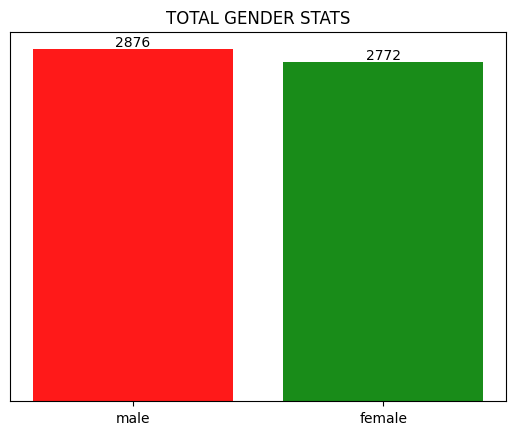

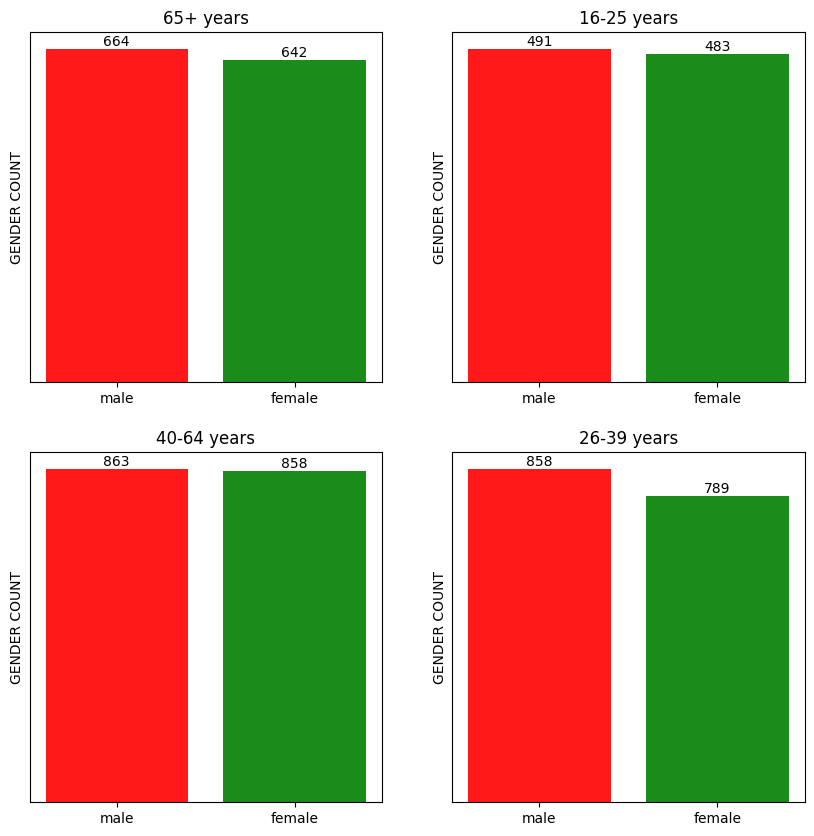

In [569]:
def gender_stat(dataset):
    # Total genders count
    gender_df = dataset['GENDER']

    bar_total_counts(gender_df,'TOTAL GENDER STATS', colors)

    # Gender count in each age category
    unique_ages = dataset['AGE'].unique()
    plots_per_row = 2
    num_rows = (len(unique_ages) + plots_per_row - 1) // plots_per_row
    
    fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(10, 10))
    axs = axs.flatten()
    for i, age in enumerate(unique_ages):
        ax = axs[i]
        
        age_gender_df = dataset[dataset['AGE'] == age]
        age_gender_df = age_gender_df['GENDER']
        counts = age_gender_df.value_counts()
        x_vals = range(len(counts))
        ax.bar(counts.index, counts, align='center', alpha=0.9, color=colors)
        
        for j, count in enumerate(counts):
            ax.text(x_vals[j], count, count, ha='center', va='bottom')

        ax.set_title(f'{age} years')
        ax.set_yticks([])  # Hide y-axis ticks
        ax.set_ylabel("GENDER COUNT")
gender_hist(DATASET)

## Statistic about outcomes

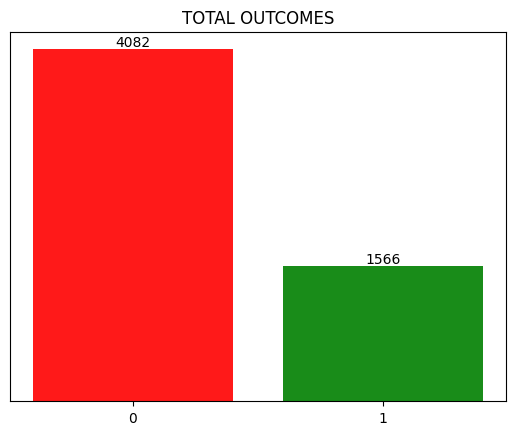

In [570]:
def outcome_hist(dataset):
    outcome_df = dataset['OUTCOME']
    counts = outcome_df.value_counts()
    plt.figure()
    x_vals = range(len(counts))
    plt.bar (x_vals,counts,align= 'center',alpha = 0.9, color=colors)

    for i, count in enumerate(counts):
        plt.text(x_vals[i], count, count, ha='center', va='bottom')
        
    plt.title("TOTAL OUTCOMES")
    plt.yticks([])
    plt.xticks(x_vals, counts.index)
    
outcome_hist(DATASET)

## Outcomes displayed by ages

The age with maximal positive outcomes is: 16-25 with 683 positive outcomes


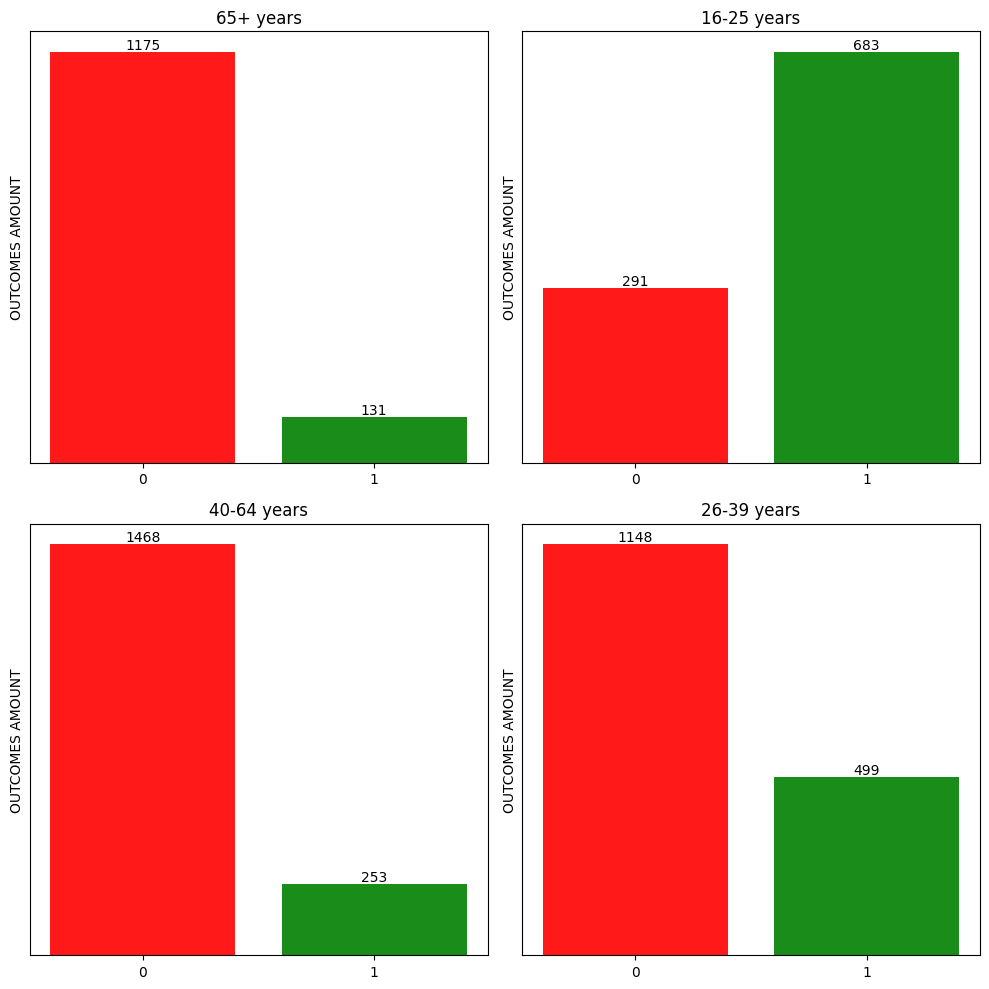

In [571]:
def ages_outcomes(dataset):
    unique_ages = dataset['AGE'].unique()
    
    # Define the number of plots per row
    plots_per_row = 2
    num_rows = (len(unique_ages) + plots_per_row - 1) // plots_per_row
    
    fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(10, 10))
    axs = axs.flatten()
    max_outcome_age = 0
    max_outcome_count = 0
    
    for i, age in enumerate(unique_ages):
        ax = axs[i]
        
        filter_age_df = dataset[dataset['AGE'] == age]
        outcome_df = filter_age_df['OUTCOME']
        counts = outcome_df.value_counts()
        
        sorted_counts = counts.reindex([0, 1]).fillna(0)  # Ensure counts for both 0 and 1 are present
        if sorted_counts[1] > max_outcome_count:
            max_outcome_count = sorted_counts[1]
            max_outcome_age = age
        
        x_vals = sorted_counts.index
        ax.bar(x_vals, sorted_counts, align='center', alpha=0.9, color=colors)
        
        for j, count in enumerate(sorted_counts):
            ax.text(x_vals[j], count, count, ha='center', va='bottom')
        
        ax.set_title(f'{age} years')
        ax.set_yticks([])  # Hide y-axis ticks
        ax.set_ylabel("OUTCOMES AMOUNT")
        ax.set_xticks(x_vals)
    print(f"The age with maximal positive outcomes is: {max_outcome_age} with {max_outcome_count} positive outcomes")
    plt.tight_layout()
    plt.show()
    
ages_outcomes(DATASET)

# Global statistics about outcomes

## This function will show each characteristic of a person.
### The larger the circle, the more people have this characteristic.
### As well as the colors: <font color='green'>green</font> - received insurance, <font color='red'>red</font> - did not receive.

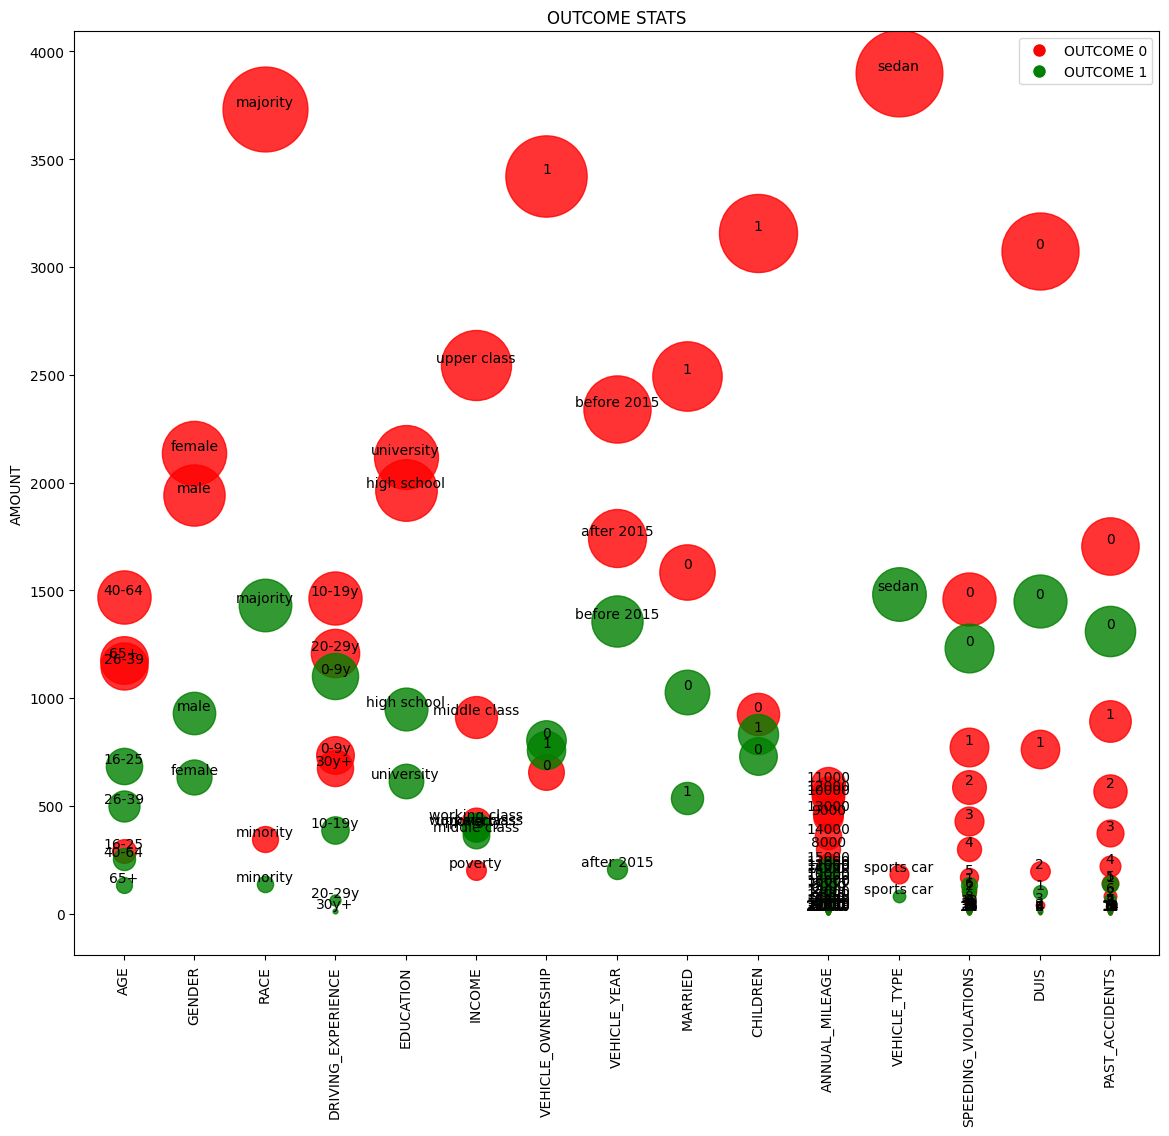

In [580]:
def outcome_stat(dataset):
    fig = plt.figure(figsize=(14, 12)) # set figure size
    dataset = dataset.drop('CREDIT_SCORE', axis=1)
    handles = [Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color) for color in colors] # labels for legend
    for outcome in range(2): # compare OUTCOME 0 and 1 stats
        outcome_df = dataset[dataset['OUTCOME'] == outcome]
        outcome_df = outcome_df.drop(outcome_df.columns[-1], axis=1) # remove OUTCOME column
        for i, column in enumerate(outcome_df.columns):
            value_counts = outcome_df[column].value_counts().reset_index() # calc amount of unique values   
            for _, (title, count) in value_counts.iterrows():
                plt.scatter(
                    i, # x
                    count, # y
                    s=count, # size
                    alpha=0.8,
                    color=colors[outcome]
                )
                plt.text(i, count, f'{title}', ha='center', va='bottom')

    legend_labels = ['OUTCOME 0', 'OUTCOME 1']
    plt.ylabel("AMOUNT")
    plt.xticks(range(len(outcome_df.columns)), outcome_df.columns.tolist(), rotation=90)
    plt.legend(handles=handles, labels=legend_labels)
    plt.title('OUTCOME STATS')
outcome_stat(DATASET)

# View detailed stats

In [587]:
def detailed_outcome_stat(dataset, column):
    handles = [Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color) for color in colors] # labels for legend
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    dataset = dataset.drop('CREDIT_SCORE', axis=1)
    for outcome in range(2): # compare OUTCOME 0 and 1 stats
        outcome_df = dataset[dataset['OUTCOME'] == outcome]
        outcome_df = outcome_df.drop('OUTCOME', axis=1) # remove OUTCOME column
        value_counts = outcome_df[column].value_counts().reset_index() # calc amount of unique values   
        for _, (title, count) in value_counts.iterrows():
            axs[outcome].scatter(
                outcome, # x
                count, # y
                s=count*1.5, # size
                alpha=0.8,
                color=colors[outcome]
            )
            axs[outcome].text(outcome, count, f'{title}', ha='center', va='bottom')
        axs[outcome].set_ylabel("PEOPLE AMOUNT")
        axs[outcome].set_xticks([])
        axs[outcome].set_xlabel(column)
    plt.tight_layout()

In [588]:
# Create a widget for selecting the column
column_select = DATASET.drop(DATASET.columns[-1], axis=1).columns.tolist()
column_widget = widgets.Dropdown(options=column_select, description='Select Column')

# Create the interactive widget
interactive_plot = interactive(detailed_outcome_stat, dataset=widgets.fixed(DATASET), column=column_widget)

# Display the widget
display(interactive_plot)

interactive(children=(Dropdown(description='Select Column', options=('AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIE…

### According to the above charts, people with fewer negative factors and fewer positive skills have a greater chance of getting a positive result

# Correlation

In [592]:
def calc_corr(dataset):
    corr_df = dataset.copy()
    corr_df['GENDER'] = corr_df['GENDER'].apply(lambda x: 1 if x == 'male' else 0) # 1 - male, 0 - female
    corr_df['VEHICLE_YEAR'] = corr_df['VEHICLE_YEAR'].apply(lambda x: 1 if x == 'after 2015' else 0) # 1 - new cars, 0 - old cars
    corr_df['EDUCATION'] = corr_df['EDUCATION'].apply(lambda x: 1 if x == 'university' else 0) # 1 - university, 0 - high school
    corr_df['RACE'] = corr_df['RACE'].apply(lambda x: 1 if x == 'majority' else 0) # 1 - majority, 0 - minority
    corr_df['VEHICLE_TYPE'] = corr_df['VEHICLE_TYPE'].apply(lambda x: 1 if x == 'sedan' else 0) # 1 - sedan, 0 - sports car
    print(corr_df['INCOME'].unique())
    
    # the higher ages, the bigger value 16-25 = 0, 26-39 = 1, 40-64 = 2, 65+ = 3
    change_values_income = {
        'poverty' : 0,
        'working class' : 1,
        'middle class' : 2,
        'upper class' : 3
    }
    
    # the higher ages, the bigger value 16-25 = 0, 26-39 = 1, 40-64 = 2, 65+ = 3
    change_values_age = {
        '16-25' : 0,
        '26-39' : 1,
        '40-64' : 2,
        '65+' : 3
    }

    # the higher driving experience, the bigger value 0-9y = 0, 10-19y = 1, 20-29y = 2, 30y+ = 3
    change_values_drivexp = {
        '0-9y' : 0,
        '10-19y' : 1,
        '20-29y' : 2,
        '30y+' : 3
    }
    corr_df['AGE'] = corr_df['AGE'].replace(change_values_age)
    corr_df['INCOME'] = corr_df['INCOME'].replace(change_values_income)
    corr_df['DRIVING_EXPERIENCE'] = corr_df['DRIVING_EXPERIENCE'].replace(change_values_drivexp)
    
    correlation = corr_df.corr()['OUTCOME'].sort_values(ascending=False)
    correlation = correlation.drop('OUTCOME')
    return correlation
correlation = calc_corr(DATASET)

['upper class' 'working class' 'middle class' 'poverty']


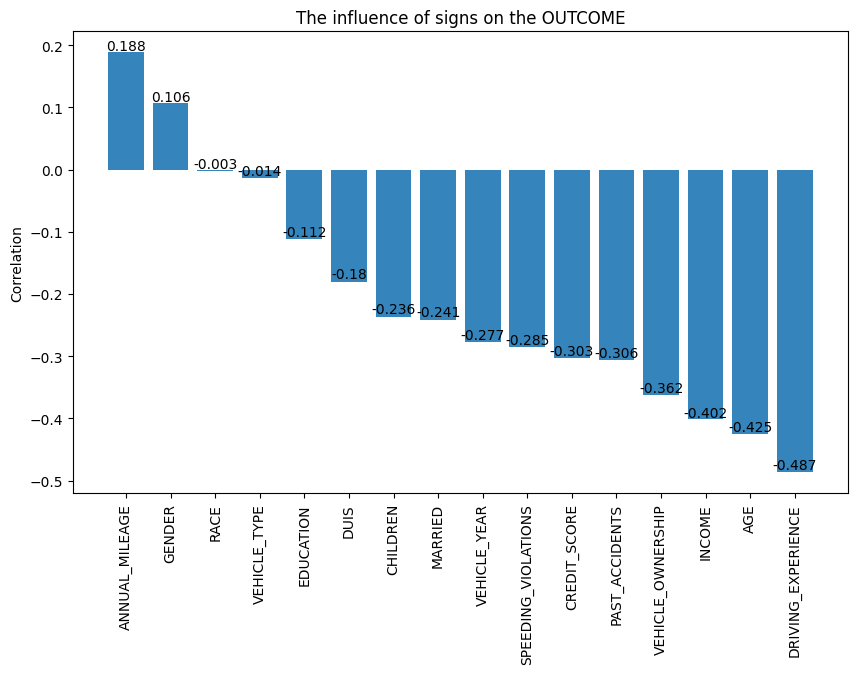

In [593]:
bar(correlation.to_frame().transpose(),0 , 'The influence of signs on the OUTCOME', 'Correlation')

# Conclusions
## Інформація відповідно до даних досліджених вище

1. ANNUAL_MILEAGE (Річний пробіг) - Позитивна кореляція 0.188 означає, що автомобілі з більшим річним пробігом можуть мати більшу ймовірність позитивного результату.

2. GENDER (Стать) - Позитивна кореляція 0.106 вказує на те, що стать (чоловік) може мати вплив на позитивний результат.

3. RACE (Раса) - Близька до нуля кореляція (-0.003) показує, що раса не впливає на результат.

4. VEHICLE_TYPE (Тип автомобіля) - Близька до нуля кореляція (-0.014) вказує на те, що тип автомобіля майже не впливає на результат.

5. EDUCATION (Освіта) - Негативна кореляція (-0.112) означає, що освіта може мати вплив на результат, де більше освічені можуть мати меншу ймовірність позитивного результату.

6. DUIS (П'яні за кермом) - Негативна кореляція (-0.18) вказує на те, що наявність попередніх випадків водіння у стані сп'яніння негативно впливає на результат.

7. CHILDREN (Діти) - Негативна кореляція (-0.236) показує, що наявність дітей може негативно впливати на результат.

8. MARRIED (Шлюб) - Негативна кореляція (-0.241) означає, що статус одруженості може негативно впливати на результат.

9. VEHICLE_YEAR (Рік автомобіля) - Негативна кореляція (-0.277) означає, що автомобілі, випущені в новіші роки, можуть мати меншу ймовірність позитивного результату.

10. SPEEDING_VIOLATIONS (Порушення правил швидкості) - Негативна кореляція (-0.285) вказує на те, що кількість порушень правил швидкості можуть негативно впливає на результат.

11. CREDIT_SCORE (Кредитний рейтинг) - Негативна кореляція (-0.303) показує, що низький кредитний рейтинг може негативно впливає на результат.

12. PAST_ACCIDENTS (Попередні аварії) - Негативна кореляція (-0.306) вказує на те, що наявність попередніх аварій може негативно впливає на результат.

13. VEHICLE_OWNERSHIP (Наявність автомобіля) - Негативна кореляція (-0.362) означає, що наявність свого автомобіля може негативно впливає на результат.

14. INCOME (Дохід) - Негативна кореляція (-0.402) означає, що наявність більшого доходу може негативно впливає на результат.

15. AGE (Вік) - Негативна кореляція (-0.425) вказує на те, що старші люди можуть мати менший шанс отримати позитивний результат.

16. DRIVING_EXPERIENCE (Водійський досвід) - Негативна кореляція (-0.487) означає, що більший водійський досвід може негативно на позитивний результат.